<a href="https://colab.research.google.com/github/321999/Data-analysis-using-power-bi/blob/main/prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:

url = "http://bit.ly/w-data"

data=pd.read_csv(url)
# data.tail()#to get the first 5 tuples
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
# check how many columns are there
# data.columns
# check is any null value present in the dataset or not 
data.isnull().sum()#this statement will return boolean value ,i have sum all the true value, we got the zero for both the column which means no null value present,also mean we have right data 





Hours     0
Scores    0
dtype: int64

In [18]:
# know checking for any duplicate value 
data.duplicated().sum()

0

# Exploratory Data Analysis of the data

In [19]:
%%html
<marquee style="background:orange"><h1>Exploratory Data Analysis</h1></marquee>

<ipython-input-21-75da255ae286>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data["Scores"],color="red")


<Axes: xlabel='Scores', ylabel='Density'>

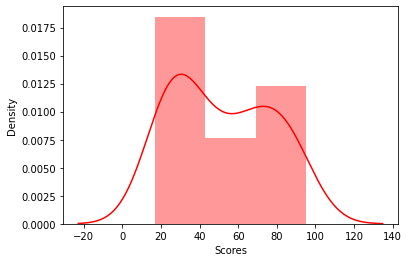

In [21]:
# viewing the distribution of the scores
sn.distplot(data["Scores"],color="red")

<Axes: xlabel='Hours', ylabel='Scores'>

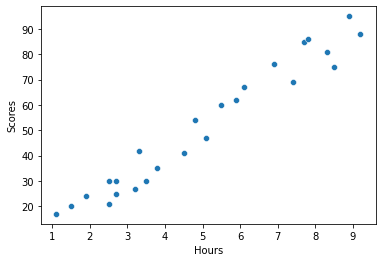

In [22]:
# making the scatterplot of he data
sn.scatterplot(x=data["Hours"],y=data["Scores"])
# from this scatterplot we come to know about that as we have high number of study hours that scores can be there means high number of study hour is directly proportional to score u get


<Axes: >

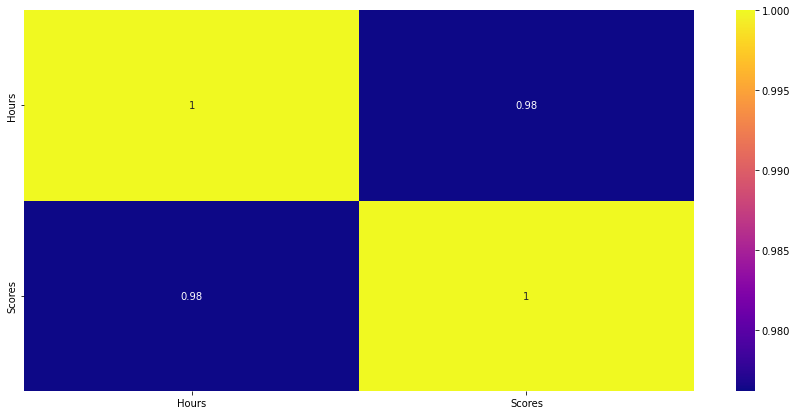

In [23]:
# lets check the correlation between NUMBER_OF_hour_study and the SCORES get
plt.figure(figsize=(15,7))
sn.heatmap(data.corr(),annot=True,cmap='plasma')

In [ ]:
y=data['Scores']#dependent variable 
x=data[["Hours"]]#independent variable 
# x.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# print(f"{X_train}\nhgghj {X_test}hghjg\n{y_train}\nkjbjb {y_test}")
#  train the model
lr=LinearRegression()
lr.fit(X_train,y_train)

# predict the thing
d={
    "e":lr.predict(X_test),
    "value":X_test
}
y_predict=lr.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

# data["predicted"]=lr.predict(X_test)
# data["value"]=X_test
# pd.DataFrame(d)
# data.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# checking with my own data
no_of_hour_study=[[9.25]]

y_predict=lr.predict(no_of_hour_study)
# testing_with_own_value=pd.DataFrame({"actual":,"predicted":y_predict})
# testing_with_own_value
print(f"Predicted score of a student studies for {no_of_hour_study}hrs/day is:str({y_predict})")



 predicted score of a student studies for [[9.25]]hrs/day is:str([93.69173249])


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# print(f"{y_train}")
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
print('R-squared score: %.2f' % r2_score(y_test, y_predict))

Mean squared error: 21.60
R-squared score: 0.95
